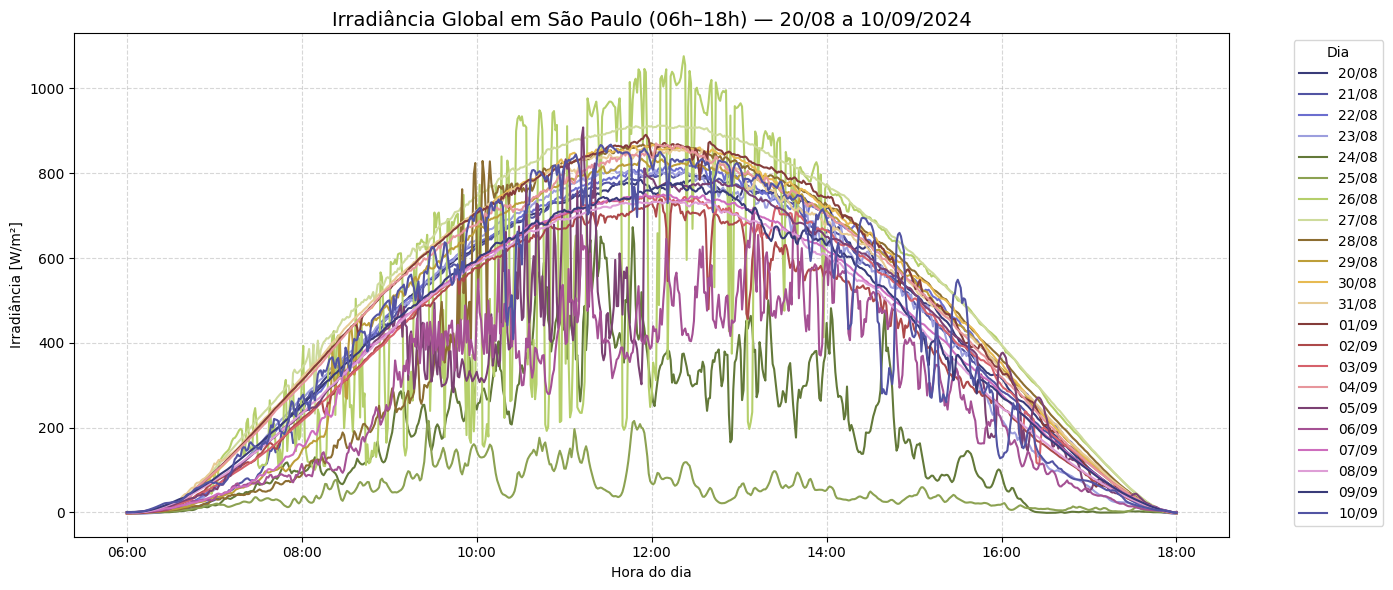

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Leitura e pré-processamento ===
df = pd.read_excel('/content/drive/MyDrive/Meteorologia USP/TCC/Irradiancia/irrad_ifusp.xlsx')
df['irradiancia (W/m2)'] = df['irradiancia (W/m2)'].astype(str).str.replace(',', '.').astype(float)
df['hora_str'] = df['hora'].astype(str).apply(lambda x: f"{int(x.split(':')[0]):02d}:{int(x.split(':')[1]):02d}:00")
df['data'] = pd.to_datetime(df['ano'] * 1000 + df['dia do ano'], format='%Y%j')
df['datetime'] = pd.to_datetime(df['data'].astype(str) + ' ' + df['hora_str'])
df['hora'] = pd.to_datetime(df['hora_str'], format='%H:%M:%S').dt.time

# === Filtrar datas e horário entre 06h e 18h ===
inicio = pd.to_datetime('2024-08-20')
fim = pd.to_datetime('2024-09-10')
df = df[(df['data'] >= inicio) & (df['data'] <= fim)]
df = df[(df['hora'] >= pd.to_datetime('06:00:00').time()) & (df['hora'] <= pd.to_datetime('18:00:00').time())]

# === Gráfico ===
plt.figure(figsize=(14, 6))

dias_unicos = sorted(df['data'].unique())
cmap = plt.get_cmap('tab20b')
cores = [cmap(i % 20) for i in range(len(dias_unicos))]

for dia, cor in zip(dias_unicos, cores):
    df_dia = df[df['data'] == dia]
    plt.plot(df_dia['hora_str'], df_dia['irradiancia (W/m2)'], label=dia.strftime('%d/%m'), color=cor)

# Ajuste do eixo X: mostrar apenas horas principais
horas_marcadas = [f'{h:02d}:00:00' for h in range(6, 19, 2)]  # de 6h a 18h a cada 2h
plt.xticks(horas_marcadas, [h[:5] for h in horas_marcadas])  # mostra só HH:MM

plt.title('Irradiância Global em São Paulo (06h–18h) — 20/08 a 10/09/2024', fontsize=14)
plt.xlabel('Hora do dia')
plt.ylabel('Irradiância [W/m²]')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Dia', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()



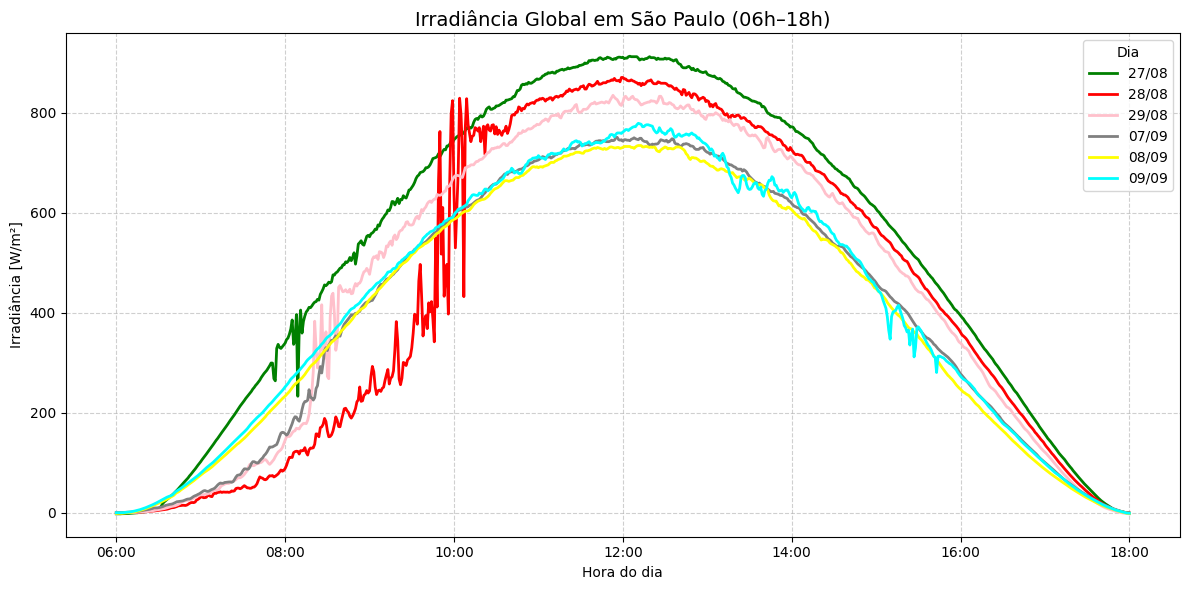

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Leitura e pré-processamento ===
df = pd.read_excel('/content/drive/MyDrive/Meteorologia USP/TCC/Irradiancia/irrad_ifusp.xlsx')
df['irradiancia (W/m2)'] = df['irradiancia (W/m2)'].astype(str).str.replace(',', '.').astype(float)
df['hora_str'] = df['hora'].astype(str).apply(lambda x: f"{int(x.split(':')[0]):02d}:{int(x.split(':')[1]):02d}:00")
df['data'] = pd.to_datetime(df['ano'] * 1000 + df['dia do ano'], format='%Y%j')
df['datetime'] = pd.to_datetime(df['data'].astype(str) + ' ' + df['hora_str'])
df['hora'] = pd.to_datetime(df['hora_str'], format='%H:%M:%S').dt.time

# === Dias desejados e suas cores ===
dias_desejados = {
    pd.to_datetime('2024-08-27'): 'green',
    pd.to_datetime('2024-08-28'): 'red',
    pd.to_datetime('2024-08-29'): 'pink',
    pd.to_datetime('2024-09-07'): 'grey',
    pd.to_datetime('2024-09-08'): 'yellow',
    pd.to_datetime('2024-09-09'): 'cyan',
}

# === Filtrar dias e intervalo de horário ===
df = df[df['data'].isin(dias_desejados.keys())]
df = df[(df['hora'] >= pd.to_datetime('06:00:00').time()) & (df['hora'] <= pd.to_datetime('18:00:00').time())]

# === Gráfico ===
plt.figure(figsize=(12, 6))

for dia, cor in dias_desejados.items():
    df_dia = df[df['data'] == dia]
    plt.plot(df_dia['hora_str'], df_dia['irradiancia (W/m2)'],
             label=dia.strftime('%d/%m'), color=cor, linewidth=2)

# Eixo X limpo com horas principais
horas_marcadas = [f'{h:02d}:00:00' for h in range(6, 19, 2)]
plt.xticks(horas_marcadas, [h[:5] for h in horas_marcadas])

plt.title('Irradiância Global em São Paulo (06h–18h)', fontsize=14)
plt.xlabel('Hora do dia')
plt.ylabel('Irradiância [W/m²]')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Dia', loc='upper right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-16-2040875233.py:81: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


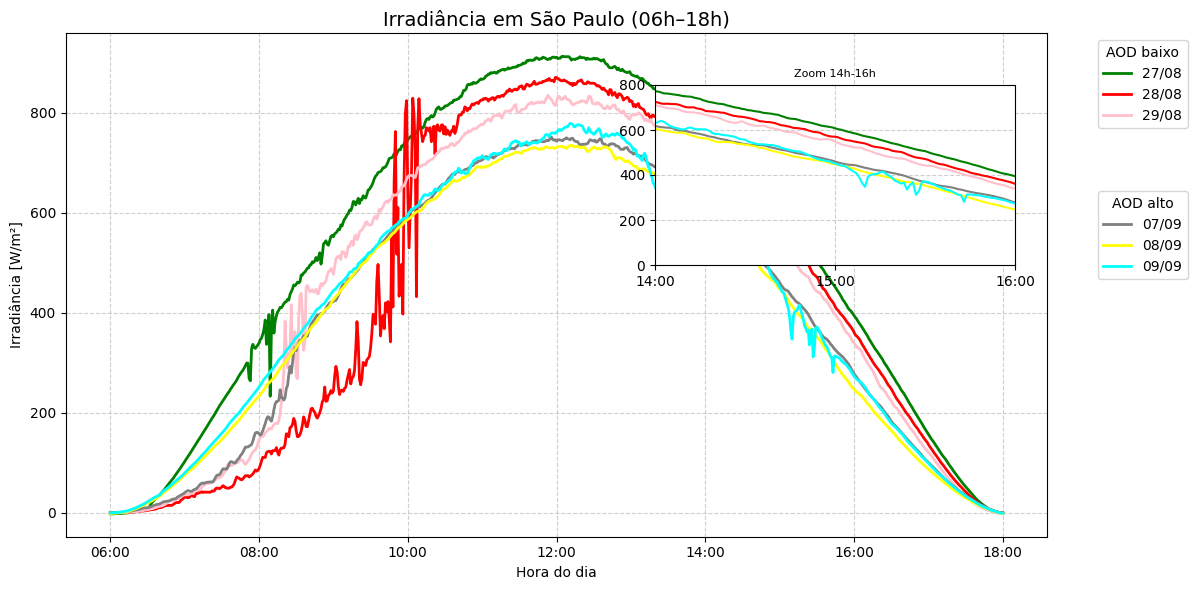

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Leitura e pré-processamento ===
df = pd.read_excel('/content/drive/MyDrive/Meteorologia USP/TCC/Irradiancia/irrad_ifusp.xlsx')
df['irradiancia (W/m2)'] = df['irradiancia (W/m2)'].astype(str).str.replace(',', '.').astype(float)
df['hora_str'] = df['hora'].astype(str).apply(lambda x: f"{int(x.split(':')[0]):02d}:{int(x.split(':')[1]):02d}:00")
df['data'] = pd.to_datetime(df['ano'] * 1000 + df['dia do ano'], format='%Y%j')
df['datetime'] = pd.to_datetime(df['data'].astype(str) + ' ' + df['hora_str'])
df['hora'] = pd.to_datetime(df['hora_str'], format='%H:%M:%S').dt.time

# === Dias desejados e suas cores ===
dias_desejados = {
    pd.to_datetime('2024-08-27'): 'green',
    pd.to_datetime('2024-08-28'): 'red',
    pd.to_datetime('2024-08-29'): 'pink',
    pd.to_datetime('2024-09-07'): 'grey',
    pd.to_datetime('2024-09-08'): 'yellow',
    pd.to_datetime('2024-09-09'): 'cyan',
}

# === Filtrar dias e intervalo de horário ===
df = df[df['data'].isin(dias_desejados.keys())]
df = df[(df['hora'] >= pd.to_datetime('06:00:00').time()) & (df['hora'] <= pd.to_datetime('18:00:00').time())]

# === Gráfico principal ===
plt.figure(figsize=(12, 6))

# Plotar curvas principais
for dia, cor in dias_desejados.items():
    df_dia = df[df['data'] == dia]
    plt.plot(df_dia['hora_str'], df_dia['irradiancia (W/m2)'],
             label=dia.strftime('%d/%m'), color=cor, linewidth=2)

# Eixo X limpo com horas principais
horas_marcadas = [f'{h:02d}:00:00' for h in range(6, 19, 2)]
plt.xticks(horas_marcadas, [h[:5] for h in horas_marcadas])

# Configurações do gráfico principal
plt.title('Irradiância em São Paulo (06h–18h)', fontsize=14)
plt.xlabel('Hora do dia')
plt.ylabel('Irradiância [W/m²]')
plt.grid(True, linestyle='--', alpha=0.6)

# Criar legenda personalizada com dois grupos
handles_agosto = []
handles_setembro = []
for dia, cor in dias_desejados.items():
    df_dia = df[df['data'] == dia]
    line, = plt.plot([], [], color=cor, linewidth=2)
    if dia.month == 8:
        handles_agosto.append((line, dia.strftime('%d/%m')))
    else:
        handles_setembro.append((line, dia.strftime('%d/%m')))

# Adicionar legendas separadas
legend1 = plt.legend([h[0] for h in handles_agosto], [h[1] for h in handles_agosto],
                     title='AOD baixo', loc='upper right', bbox_to_anchor=(1.15, 1.0))
plt.legend([h[0] for h in handles_setembro], [h[1] for h in handles_setembro],
           title='AOD alto', loc='upper right', bbox_to_anchor=(1.15, 0.7))
plt.gca().add_artist(legend1)

# === Gráfico interno (inset) com zoom entre 13h e 17h ===
ax_inset = plt.axes([0.55, 0.55, 0.3, 0.3])  # [left, bottom, width, height]
for dia, cor in dias_desejados.items():
    df_dia = df[df['data'] == dia]
    df_zoom = df_dia[(df_dia['hora'] >= pd.to_datetime('14:00:00').time()) &
                     (df_dia['hora'] <= pd.to_datetime('16:00:00').time())]
    ax_inset.plot(df_zoom['hora_str'], df_zoom['irradiancia (W/m2)'],
                  color=cor, linewidth=1.5)

# Configurações do inset
ax_inset.set_xlim('14:00:00', '16:00:00')
ax_inset.set_ylim(0, 800)
ax_inset.set_xticks(['14:00:00', '15:00:00', '16:00:00'])
ax_inset.set_xticklabels(['14:00', '15:00', '16:00'])
ax_inset.set_title('Zoom 14h-16h', fontsize=8)
ax_inset.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()